<a href="https://colab.research.google.com/github/anassboussarhan/Kmeans/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

In [133]:
# initialize test cases

X1 = np.array([
    [1, 2],
    [3, 4],
    [5, 6],
    [7, 8],
    [9, 10],
    [11, 12],
    ])

X2 = np.random.rand(1000, 2)
X3 = make_moons(100)[0]

In [33]:
# To use , in case we need to nomalize the data
# NB: KMeans algorithm converge faster and better on normalized data

sc = StandardScaler()
sc.fit(X1)
X1 = sc.transform(X1)

array([[ 1. ,  2. ],
       [ 1.5,  1.8],
       [ 5. ,  8. ],
       [ 8. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ]])

In [143]:
class K_Means:

    def __init__(
        self,
        k=2,
        max_tol=0.0001,
        max_iter=200,
        ):
        self.k = k
        self.max_iter = max_iter
        self.max_tol = max_tol
        self.centroid = None
        self.idx = None
        self.data = None

    def fit(self, X):
        self.data = X

      # Initialize the centroids and indices by choosing 'k' random elements from the dataset

        random_idx = np.random.choice(len(self.data), self.k,
                replace=False)
        previous_centroids = self.data[random_idx, :]
        previous_idx = np.argmin(distance.cdist(self.data,
                                 previous_centroids, 'euclidean'),
                                 axis=1)

        for j in range(self.max_iter):

        # Calculate the new centroids and assign each item to the closest cluster

            current_centroids = np.vstack([self.data[previous_idx == i,
                    :].mean(axis=0) for i in range(self.k)])
            current_idx = np.argmin(distance.cdist(self.data,
                                    current_centroids, 'euclidean'),
                                    axis=1)

        # Check for one of the convergence conditions

            if np.array_equal(current_idx, previous_idx) \
                or np.sum((current_centroids - previous_centroids)
                          / previous_centroids * 100.0) < self.max_tol:
                print ('Converged at iteration:' + str(j))
                break
            else:
                previous_centroids = current_centroids
                previous_idx = current_idx
        self.centroid = current_centroids
        self.idx = current_idx
        return (current_centroids, current_idx)

    def plot(self):
        plt.figure(figsize=(20, 10))
        plt.scatter(self.data[:, 0], self.data[:, 1], c=self.idx)
        plt.show()

**Test Cases:**

Converged at iteration:0


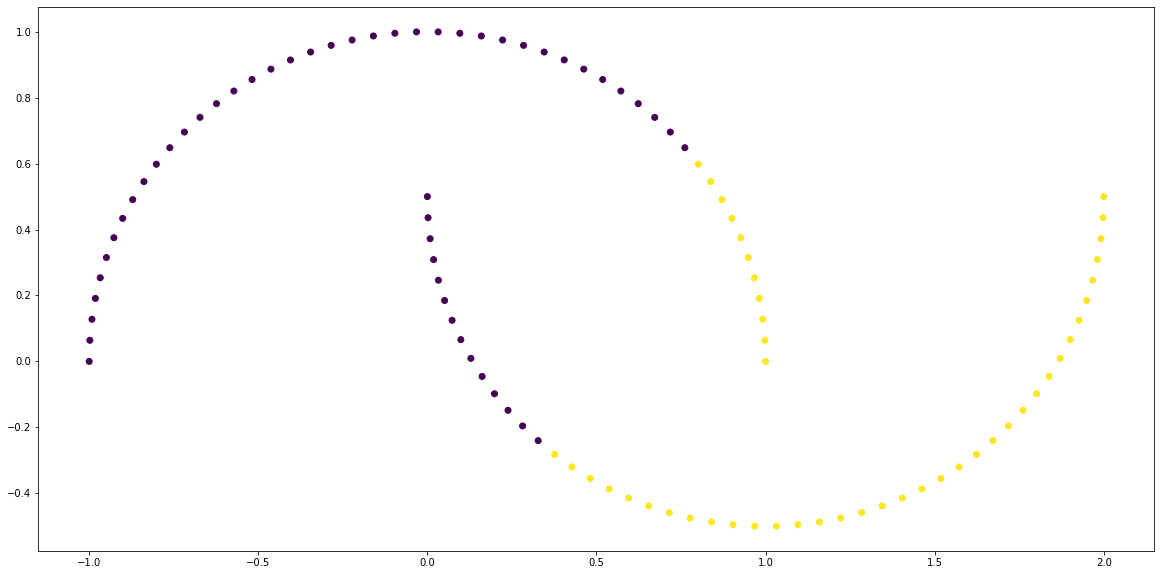

In [145]:
model=K_Means()
model.fit(X3)
model.plot()

Converged at iteration:4


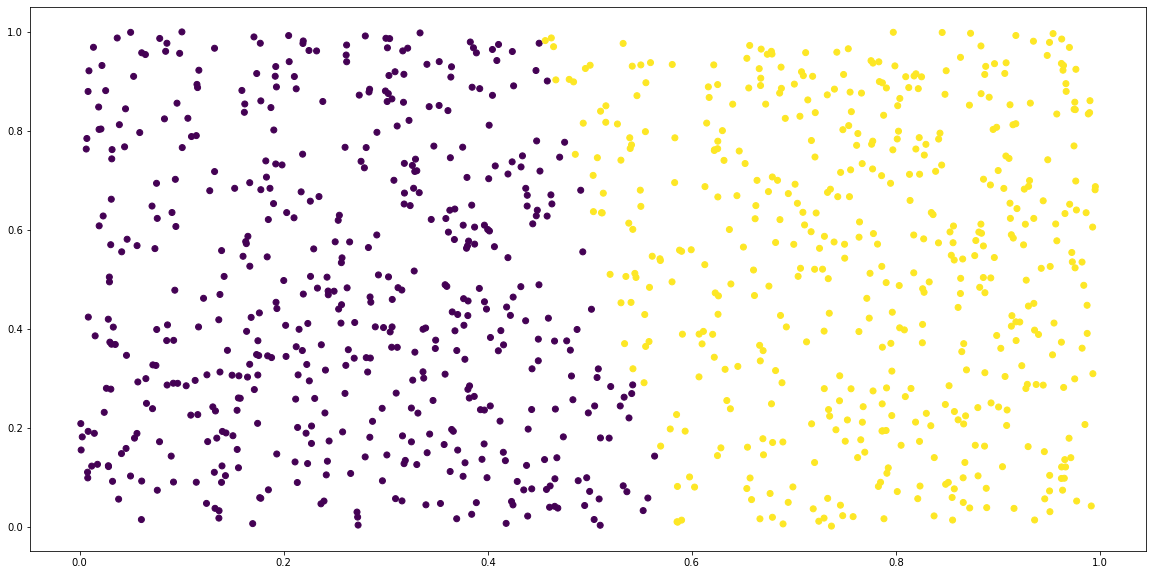

In [141]:
model=K_Means()
model.fit(X2)
model.plot()

Converged at iteration:1


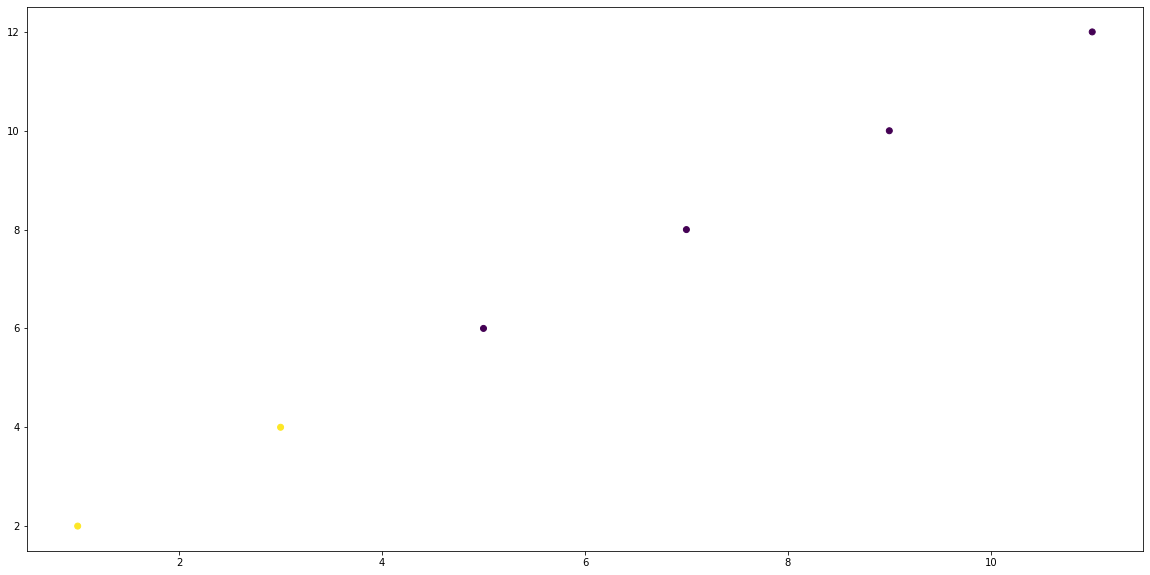

In [147]:
model=K_Means()
model.fit(X1)
model.plot()